<a href="https://colab.research.google.com/github/sensiboi/Edutech-Data-Analysis/blob/main/EdTech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDTECH DATA ANALYSIS**

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Load Datasets

In [20]:
df= pd.read_csv("edtech.csv")

Description of the dataset

In [21]:
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nMissing values:\n", df.isnull().sum())

Dataset shape: (81, 14)

Columns:
 Index(['Unnamed: 0', 'title', 'installs', 'score', 'ratings', 'reviews',
       'size', 'androidVersion', 'developer', 'contentRating', 'containsAds',
       'released', 'updated', 'version'],
      dtype='object')

Missing values:
 Unnamed: 0         0
title              0
installs           0
score              0
ratings           22
reviews            0
size               0
androidVersion     0
developer          0
contentRating      0
containsAds        0
released           0
updated            0
version            0
dtype: int64


Drop irrelevant identifiers

In [22]:
df = df.drop(['Unnamed: 0', 'title', 'developer', 'released', 'updated', 'version'], axis=1)

In [23]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-4072275310.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Encode categorical columns

In [24]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

Define Features (X) and Target (Y)

In [25]:
X = df.drop('score', axis=1)
y = df['score']

Split dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale Features

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Basic Visualization

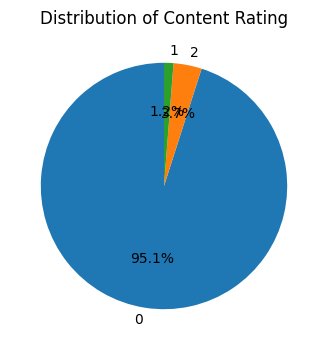

In [28]:
plt.figure(figsize=(6,4))
df['contentRating'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Content Rating")
plt.ylabel("")
plt.show()

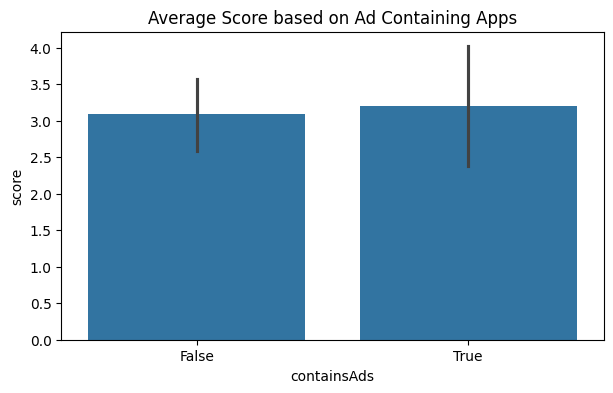

In [29]:
plt.figure(figsize=(7,4))
sns.barplot(x='containsAds', y='score', data=df, estimator=np.mean)
plt.title("Average Score based on Ad Containing Apps")
plt.show()

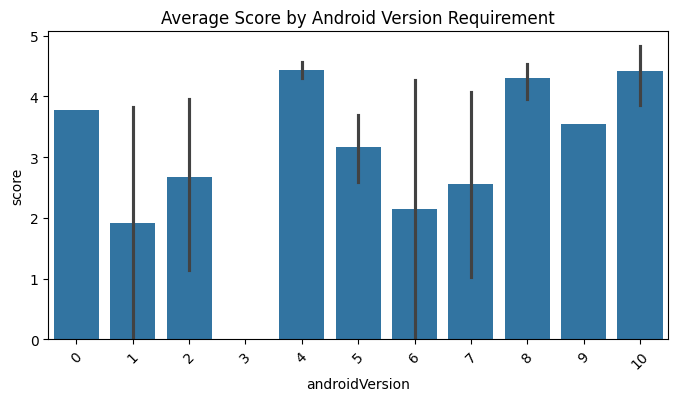

In [30]:
plt.figure(figsize=(8,4))
sns.barplot(x='androidVersion', y='score', data=df, estimator=np.mean)
plt.title("Average Score by Android Version Requirement")
plt.xticks(rotation=45)
plt.show()